<a href="https://colab.research.google.com/github/Toadoum/Machine-Learning-from-scratch/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import the dataset

In [ ]:
data = pd.read_excel("data.xlsx")
data.head()

,X1,X2,X3,X4,Y
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data.shape

(9568, 5)

# Standardize the data. The data will follow a standard normal distribution with mean 0 and std 1.

In [ ]:
#def feature_standard(data):
  ######## write your code #########
  #data_Scaled= (data - data.mean(axis=0))/data.std(axis=0)


  #return data_Scaled

In [ ]:
def feature_standard(data):
  ######## write your code #########
  dmean=np.mean(data, axis=0)
  dstd= np.mean(data, axis=0)
  data_Scaled= (data - dmean)/dstd


  return data_Scaled

In [ ]:
Standard_data=feature_standard(data)

In [ ]:
data.iloc[:, 0:-1]=Standard_data.iloc[:, 0:-1]
data.head()

,X1,X2,X3,X4,Y
0,-0.238725,-0.231021,0.010669,-0.001896,463.26
1,0.281345,0.159360,0.006692,-0.194096,444.37
2,-0.739965,-0.274479,-0.001085,0.256872,488.56
3,0.061511,0.055504,-0.002980,0.045438,446.48
4,-0.449398,-0.309466,-0.003976,0.317983,473.90


In [ ]:
data.describe()

,X1,X2,X3,X4,Y
count,9.568000e+03,9.568000e+03,9.568000e+03,9.568000e+03,9568.000000
mean,-2.597792e-15,-4.107216e-15,-2.772777e-15,1.482405e-15,454.365009
std,3.792370e-01,2.340062e-01,5.861071e-03,1.991607e-01,17.066995
min,-9.078938e-01,-5.330149e-01,-2.010254e-02,-6.513387e-01,420.260000
25%,-3.125113e-01,-2.313897e-01,-4.104654e-03,-1.361563e-01,439.750000
50%,3.530409e-02,-4.098648e-02,-3.149029e-04,2.272603e-02,451.550000
75%,3.088238e-01,2.252834e-01,3.948567e-03,1.571570e-01,468.430000
max,8.884313e-01,5.018653e-01,1.977867e-02,3.662719e-01,495.760000


In [ ]:
data.iloc

# Split the data in train and test

In [ ]:
def split_data(df, train_percent):
  ########## fill the code ########
  np.random.seed(3)
  perm=np.random.permutation(df.index)

  n=len(df)

  train_index=int(train_percent*n)
  train=df.iloc[perm[:train_index]]
  test=df.iloc[perm[train_index:]]

  X_train=train.iloc[:, :-1]
  Y_train=train.iloc[:, -1]

  X_test=test.iloc[:, :-1]
  Y_test=test.iloc[:, -1]

  return X_train, X_test, Y_train, Y_test

In [ ]:
X_train, X_test, Y_train, Y_test =split_data(data, 0.8)

In [ ]:
#from sklearn.model_selection import train_test_split
#def split_data(df, train_percent):
  ########## fill the code ########
  #X_train, X_test, y_train, y_test = train_test_split(data, test_size=train_percent, random_state=42)


  #return X_train, X_test, Y_train, Y_test

In [ ]:
X_train.shape, X_test.shape

((7654, 4), (1914, 4))

In [ ]:
Y_train.shape, Y_test.shape

((7654,), (1914,))

# Train a linear regression model

In [ ]:
def add_ones(X):
    ###### fill the code ####

  X_new=np.hstack([np.ones((X.shape[0], 1)), X])
    #########################


  return X_new

def compute_cost(X, y, theta):
    ######## fill the code ###########

  loss=(1/len(y))*np.sum((X.dot(theta)-y)**2)
    ##################################


  return loss


def Train(X, y, lr, epoch):


  m = len(y)
  X = add_ones(X.values)
  theta = np.zeros(X.shape[1])

  cost_history= np.zeros(epoch)

  ######## fill the code #######
  for i in range(epoch):
    
    theta_new=theta-lr*X.T.dot(X.dot(theta)-y)
    theta=theta_new
    cost_history[i]=compute_cost(X, y, theta)
  ##############################

  return  theta, cost_history
  
  
def predict(X, theta):
  ########## fill the code #########
  X=add_ones(X.values)
  yPred=X@theta


  #################################

  return yPred

def mse(y, yPred) :
    ######### fill the code ###########
    mse=np.square(np.subtract(y,yPred)).mean()


    ####################################
    return mse

In [ ]:
X_train


,X1,X2,X3,X4
213,0.415687,0.468351,-0.004825,-0.052503
6673,0.476243,0.223442,-0.002022,-0.023858
528,0.048789,0.175933,0.002143,0.007516
3616,-0.282488,-0.099175,-0.001637,0.151155
8982,0.206031,0.186798,-0.000384,-0.478372
...,...,...,...,...
3992,0.243179,0.102460,0.005745,-0.173771
8085,-0.548120,-0.269691,0.001925,0.204355
8064,0.453344,0.366705,-0.005733,-0.050594
8807,0.166339,0.079443,0.003070,-0.026313


In [ ]:
theta, loss_history = Train(X_train, Y_train, 0.000000099, 30)

In [ ]:
theta

array([ 1.02145589e+01, -1.27366133e-01, -7.49391508e-02,  9.62039175e-04,
        2.76016867e-02])

In [ ]:
loss_history

array([206363.4747649 , 206051.22601361, 205739.4501959 , 205428.14659535,
       205117.31449661, 204806.95318543, 204497.06194863, 204187.64007412,
       203878.68685087, 203570.20156894, 203262.18351948, 202954.63199469,
       202647.54628785, 202340.92569331, 202034.7695065 , 201729.07702391,
       201423.84754308, 201119.08036263, 200814.77478226, 200510.93010269,
       200207.54562573, 199904.62065423, 199602.15449213, 199300.14644437,
       198998.59581699, 198697.50191705, 198396.86405269, 198096.68153307,
       197796.9536684 , 197497.67976997])

In [ ]:
ypred = predict(X_test, theta)
mse = mse(Y_test, ypred)
mse

197802.82795568532

Text(0, 0.5, 'Cost, $J(\\theta)$')

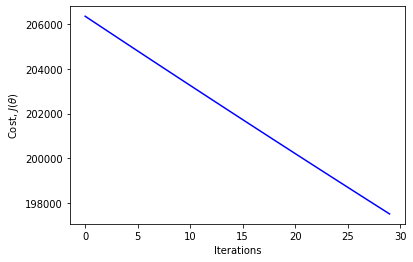

In [ ]:
epoch = 30
plt.figure()
plt.plot(np.arange(epoch), loss_history, c='blue')
plt.xlabel('Iterations')
plt.ylabel('Cost, ' + r'$J(\theta)$')

# Convert the functions into a class

# Batch gradient descent

In [ ]:
import numpy as np
class BGD:
  ######### create your own class #########

  def __init__(self, lr, epoch):
    self.lr=lr
    self.epoch=epoch
    self.theta=None
    self.cost_history=None

  def add_ones(self,X):
    self.X=X
    ###### fill the code ####
    X_new=np.hstack([np.ones((self.X.shape[0], 1)), self.X])
    #########################
    return X_new

  def compute_cost(self,X, y,theta):
    ######## fill the code ###########

    loss=(1/len(y))*np.sum((self.X.dot(self.theta)-self.y)**2)
    ##################################


    return loss


  def Train(self,X,y):
    m = len(y)
    X = add_ones(X.values)
    theta = np.zeros(X.shape[1])

    cost_history= np.zeros(epoch)

  ######## fill the code #######
    for i in range(self.epoch):
    
      theta_new=theta-self.lr*X.T.dot(X.dot(theta)-y)
      theta=theta_new
      cost_history[i]=compute_cost(X, y, theta)
  ##############################

      return  theta, cost_history
  
  
  def predict(self,X):
  ########## fill the code #########
    X=add_ones(X.values)
    yPred=X@theta
  #################################

    return yPred

  def mse(self,y, yPred) :
    self.y=y
    ######### fill the code ###########
    mse=np.square(np.subtract(y,yPred)).mean()


    ####################################
    return mse

In [ ]:
model=BGD(0.000000099, 30)

In [ ]:
theta, loss_history,model.Train(X_train, Y_train)


In [ ]:
yPred=model.predict(X_test)
yPred

In [ ]:
model.mse(Y_test,yPred)

197802.82795568532

# STOCHASTIC GRADIENT DESCENT

In [ ]:
import numpy as np
class SGD: 
  ######### create your own class #########

  def __init__(self, lr, epoch):
    self.lr=lr
    self.epoch=epoch
    self.theta=None
    self.cost_history=None

  def add_ones(self,X):
    self.X=X
    ###### fill the code ####
    X_new=np.hstack([np.ones((self.X.shape[0], 1)), self.X])
    #########################
    return X_new

    ##################################
  def compute_cost(self, X, y, theta):
    loss = ((X.dot(self.theta)-y)**2)
    return np.sum(loss)


  def Train(self, X, y):
    m = len(y)
    X = self.add_ones(X.values)
    self.theta = np.zeros(X.shape[1])
    
    self.cost_history = np.zeros(self.epoch)
    
    ######## fill the code #######
    for i in range(self.epoch):
      np.random.seed(3)
      perm = np.random.permutation(len(X_train))
      X = X[perm]
      y = y.iloc[perm]
      ##print(X[0:3])
      ##print(y[0:3])
      for j in range(len(X)):
        theta_new = self.theta - self.lr*X[j].T.dot(X[j].dot(self.theta) - y.iloc[j])
        self.theta = theta_new 
        self.cost_history[i] = self.compute_cost(X, y,self.theta)
        return  self.theta, self.cost_history
  
  def predict(self,X):
  ########## fill the code #########
    X=add_ones(X.values)
    yPred=X@theta
  #################################

    return yPred

  def mse(self,y, yPred) :
    self.y=y
    ######### fill the code ###########
    mse=np.square(np.subtract(y,yPred)).mean()


    ####################################
    return mse

In [ ]:
model1=SGD(0.000000099, 30)

In [ ]:
theta,loss_history1= model1.Train(X_train, Y_train)

In [ ]:
yPred=model1.predict(X_test)
yPred

array([5.29829666e-05, 6.22497353e-05, 3.76382253e-05, ...,
       7.31639318e-05, 6.03673744e-05, 6.69073907e-05])

In [ ]:
model1.mse(Y_test,yPred)

206989.16957046502

Text(0, 0.5, 'Cost, $J(\\theta)$')

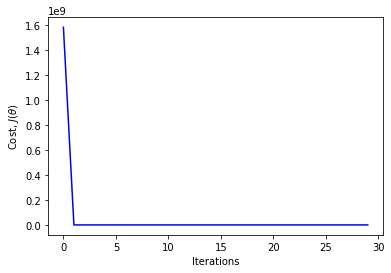

In [ ]:
epoch = 30
plt.figure()
plt.plot(np.arange(epoch), loss_history1, c='blue')
plt.xlabel('Iterations')
plt.ylabel('Cost, ' + r'$J(\theta)$')

# Mini batch gradient descent

In [ ]:
class MBGD:
  #######################
    ####################
  def __init__(self, lr, epoch, batch_size):
    self.lr = lr
    self.epoch = epoch
    self.batch_size = batch_size
    self.theta = None
    self.cost_history = None
  
  # def shuffle(self, X, y):


  def add_ones(self, X):
    X_new = np.hstack([np.ones((X.shape[0], 1)), X])
    return X_new 


  def Train(self, X, y):
    m = len(y)
    X = self.add_ones(X.values)
    self.theta = np.zeros(X.shape[1])
    
    self.cost_history = np.zeros(self.epoch)
    ######## fill the code #######
    for i in range(self.epoch):
      print("epoch:",i, "loss:",self.cost_history)
      np.random.seed(3)
      perm = np.random.permutation(len(X_train))
      X = X[perm]
      y = y.iloc[perm]

      for j in range(0, len(X), self.batch_size):
        theta_new = self.theta - (1/self.batch_size)*self.lr*X[j:j+self.batch_size].T.dot(X[j:j+self.batch_size].dot(self.theta) - y.iloc[j:j+self.batch_size])
        self.theta = theta_new 
        self.cost_history[i] = self.compute_cost(X, y, theta)

    ##############################

    ##return  self.theta, self.cost_history 
  
  def predict(self, X):
    X = self.add_ones(X.values)
    yPred = X.dot(self.theta)  
    return yPred 

  def mse(self,y, yPred) :
    self.y=y
    ######### fill the code ###########
    mse=np.square(np.subtract(y,yPred)).mean()
    return mse

  def compute_cost(self, X, y, theta):
    loss = (1/self.batch_size)*np.sum((X.dot(self.theta)-y)**2)
    return np.sum(loss)

In [ ]:
model2=MBGD(0.000000099, 30, 5)

In [ ]:
model2.Train(X_train, Y_train)

In [ ]:
yPred=model2.predict(X_test)
yPred

array([2.06310914, 2.07473165, 2.05143222, ..., 2.08373022, 2.07291452,
       2.07914539])

In [ ]:
model2.mse(Y_test,yPred)

205119.08576833332

Text(0, 0.5, 'Cost, $J(\\theta)$')

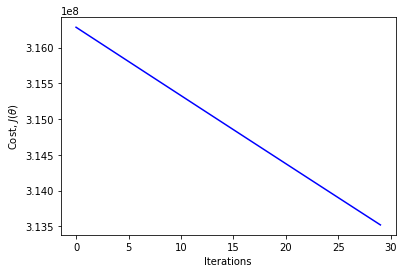

In [ ]:
epoch = 30
plt.figure()
plt.plot(np.arange(epoch), loss_history2, c='blue')
plt.xlabel('Iterations')
plt.ylabel('Cost, ' + r'$J(\theta)$')